In [2]:
from sympy import init_printing, symbols, sqrt, Add, eye, simplify
init_printing()

In [3]:
from kinematics import V3D, FV, SpinorU, SpinorV
from sympy import sin, cos, I, pi, acos
from sympy import Dummy, conjugate, Matrix
from sympy.physics.matrices import mgamma


## $e^+ e^- \to \mu^+ \mu^-$

### kinematics

In [4]:
me, mmu = symbols(r'm_e, m_\mu', positive=True)
mZ = symbols('m_Z', positive=True)
mH = symbols('m_H', positive=True)
E, p = symbols(r'E, p', positive=True)
th = V3D.th
phi = V3D.phi

In [5]:
px, py, pz = E*sin(th), 0, E*cos(th)
p3 = V3D(px, py, pz)
p4 = V3D(-px, py, -pz)


In [6]:
pmu1 = FV(E, 0, 0, p)
pmu2 = FV(E, 0, 0, -p)
pmu3 = FV(E, p3.px, p3.py, p3.pz)
pmu4 = FV(E, p4.px, p4.py, p4.pz)

In [7]:
pmu1, pmu2

In [8]:
pmu3, pmu4

In [9]:
q = pmu1 + pmu2
q2 = q*q
q2


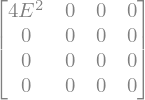

In [10]:
qmunu = q@q
qmunu

In [11]:
e = symbols('e', positive=True)
s = symbols('s', positive=True)
factorE = -e**2/q2
factors = -e**2/s

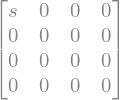

In [12]:
qmunu = qmunu.subs(4*E**2, s)
qmunu

In [13]:
u1 = lambda h1:SpinorU(pmu1, me, h1)
v2 = lambda h2:SpinorV(pmu2, me, h2)
u3 = lambda h3:SpinorU(pmu3, mmu, h3)
v4 = lambda h4:SpinorV(pmu4, mmu, h4)
I4x4 = eye(4)

In [14]:
helicities = [1, -1]

In [15]:
subs_acos = {acos(cos(th)): th,
             acos(-cos(th)):th + pi}

In [16]:
positive_mu_plus = Dummy(positive=True)
positive_mu_minus = Dummy(positive=True)
positive_e_plus = Dummy(positive=True)
positive_e_minus = Dummy(positive=True)

In [17]:
subs_El_positive = {
    E - mmu: positive_mu_minus,
    E - me: positive_e_minus
}
subs_positive_El = {
    positive_mu_minus: E - mmu,
    positive_e_minus: E - me
}

## Photon currents

In [18]:
Jmu = lambda nu, s3, s4: (
    (u3(s3).adj()*mgamma(nu)*v4(s4).matrixform())
    )[0].subs(subs_acos).subs(subs_El_positive).subs(subs_positive_El)

display(Jmu(0,1,1).simplify()) #I4x4 - mgamma(5)

Je = lambda nu, s1, s2: (
    (v2(s2).adj()*mgamma(nu, lower=True)*u1(s1).matrixform())
    )[0].subs(subs_acos).subs(subs_El_positive).subs(subs_positive_El)

display(Je(0,1,1).simplify())

## Higgs currents

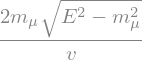

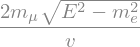

In [19]:
vev = symbols('v', positive=True)

JmuH = lambda s3, s4: (mmu/vev)*((
    (u3(s3).adj()*v4(s4).matrixform())
    )[0]).subs(subs_acos).subs(subs_El_positive).subs(subs_positive_El)

display(JmuH(1,1).simplify()) #I4x4 - mgamma(5)

JeH = lambda s1, s2: (mmu/vev)*((
    (v2(s2).adj()*u1(s1).matrixform())
    )[0]).subs(subs_acos).subs(subs_El_positive).subs(subs_positive_El)

display(JeH(1,1).simplify()) 

## Z currents

In [20]:
cVe, cAe = symbols('c_V^e, c_A^e', real=True)
cVmu, cAmu = symbols('c_V^mu, c_A^mu', real=True)

JVAe = cVe*I4x4 - cAe*mgamma(5)
JVAmu = cVmu*I4x4 - cAmu*mgamma(5)
gmunu = Matrix(
    [
        [1, 0, 0, 0],
        [0, -1, 0, 0],
        [0, 0, -1, 0],
        [0, 0, 0, -1]
    ]
)


In [21]:
JmuZ = lambda nu, s3, s4: (
    (u3(s3).adj()*mgamma(nu)*JVAmu*v4(s4).matrixform())
    )[0].subs(acos(cos(th)), th).subs(acos(-cos(th)), th + pi).subs(
        subs_El_positive
    ).subs(
        subs_positive_El
    )

display(JmuZ(0,1,1).simplify()) #I4x4 - mgamma(5)

JeZ = lambda nu, s1, s2: (
    (v2(s2).adj()*mgamma(nu)*JVAe*u1(s1).matrixform())
    )[0].subs(acos(cos(th)), th).subs(acos(-cos(th)), th + pi).subs(
        subs_El_positive
    ).subs(
        subs_positive_El
    )

display(JeZ(1,1,1).simplify())

In [22]:
def M_abs_square_photon(s1, s2, s3, s4):
    M0 = Je(0, s1, s2)*Jmu(0, s3, s4)
    M1 = Je(1, s1, s2)*Jmu(1, s3, s4)
    M2 = Je(2, s1, s2)*Jmu(2, s3, s4)
    M3 = Je(3, s1, s2)*Jmu(3, s3, s4)
    M = factors*(M0 + M1 + M2 + M3)
    return M*conjugate(M)

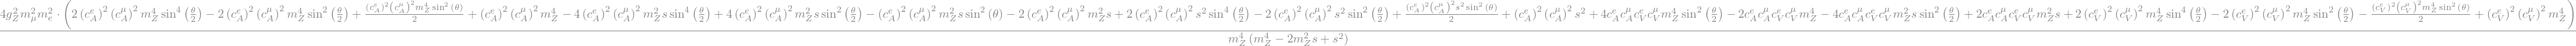

In [23]:
gZ = symbols('g_Z', positive=True)

def M_abs_square_Z(s1, s2, s3, s4):
    prop = (gmunu - qmunu/mZ**2)/(s - mZ**2)
    M = (gZ/2)*Add(*[
        JeZ(mu, s1, s2)*prop[mu,nu]*JmuZ(nu, s3, s4) 
        for mu in range(4) for nu in range(4)
    ])
    
    return M*conjugate(M)

M_abs_square_Z(1,1,1,1).subs(
        subs_El_positive
    ).subs(
        subs_positive_El
    ).simplify()

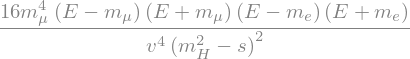

In [26]:
def M_abs_square_H(s1, s2, s3, s4):
    prop = 1/(s - mH**2)
    #M = prop*Add(*[
    #    JeH(s1, s2)*JmuH(s3, s4) 
    #    for mu in range(4) for nu in range(4)
    #])
    M = prop*JeH(s1, s2)*JmuH(s3, s4)
    
    return M*conjugate(M)

M_abs_square_H(1,1,1,1).subs(
        subs_El_positive
    ).subs(
        subs_positive_El
    ).simplify()

In [27]:
helicities_par = [
    (1,1), (1,-1),
    (-1, 1), (-1, -1)
]
lista = []
for u in helicities_par:
    row = []
    for v in helicities_par:
        row.append(
            M_abs_square_photon(u[0], u[1], v[0], v[1]).simplify().subs(E**2,s/4)
        )
    lista.append(row)
M_matrix = Matrix(lista)

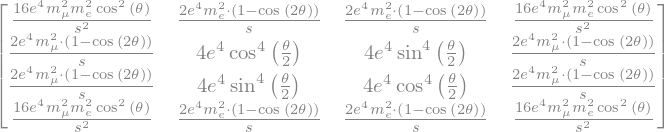

In [28]:
M_matrix

In [29]:
M_ave_photon = 0
for u in helicities_par:
    for v in helicities_par:
        M_ave_photon += M_abs_square_photon(u[0], u[1], v[0], v[1]).simplify().subs(E**2,s/4)
M_ave_photon = M_ave_photon.simplify()/4*(1/(64*pi**2*s))

In [30]:
M_ave_Z = 0
for u in helicities_par:
    for v in helicities_par:
        step = M_abs_square_Z(u[0], u[1], v[0], v[1]).subs(
        subs_El_positive
    ).subs(
        subs_positive_El
    ).simplify()
        print(f'helicities = {u[0], u[1], v[0], v[1]}')
        #display(step)
        M_ave_Z += step 
M_ave_Z = M_ave_Z/4*(1/(64*pi**2*s))#.simplify()

helicities = (1, 1, 1, 1)
helicities = (1, 1, 1, -1)
helicities = (1, 1, -1, 1)
helicities = (1, 1, -1, -1)
helicities = (1, -1, 1, 1)
helicities = (1, -1, 1, -1)
helicities = (1, -1, -1, 1)
helicities = (1, -1, -1, -1)
helicities = (-1, 1, 1, 1)
helicities = (-1, 1, 1, -1)
helicities = (-1, 1, -1, 1)
helicities = (-1, 1, -1, -1)
helicities = (-1, -1, 1, 1)
helicities = (-1, -1, 1, -1)
helicities = (-1, -1, -1, 1)
helicities = (-1, -1, -1, -1)


In [31]:
M_ave_H = 0
for u in helicities_par:
    for v in helicities_par:
        step = M_abs_square_H(u[0], u[1], v[0], v[1]).subs(
        subs_El_positive
    ).subs(
        subs_positive_El
    ).simplify()
        print(f'helicities = {u[0], u[1], v[0], v[1]}')
        #display(step)
        M_ave_H += step 
M_ave_H = M_ave_H/4*(1/(64*pi**2*s))#.simplify()

helicities = (1, 1, 1, 1)
helicities = (1, 1, 1, -1)
helicities = (1, 1, -1, 1)
helicities = (1, 1, -1, -1)
helicities = (1, -1, 1, 1)
helicities = (1, -1, 1, -1)
helicities = (1, -1, -1, 1)
helicities = (1, -1, -1, -1)
helicities = (-1, 1, 1, 1)
helicities = (-1, 1, 1, -1)
helicities = (-1, 1, -1, 1)
helicities = (-1, 1, -1, -1)
helicities = (-1, -1, 1, 1)
helicities = (-1, -1, 1, -1)
helicities = (-1, -1, -1, 1)
helicities = (-1, -1, -1, -1)


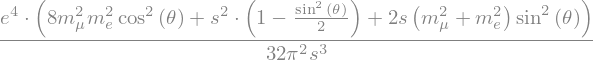

In [32]:
M_ave_photon

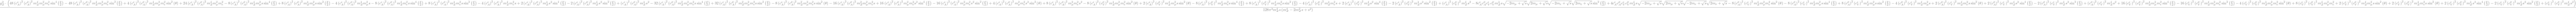

In [33]:
M_ave_Z = M_ave_Z.subs(E**2, s/4).simplify()
M_ave_Z

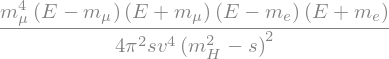

In [34]:
M_ave_H

In [35]:
high_energy_limit = {
                    me:0, mmu:0
                }

In [36]:
alpha = symbols(r'\alpha', positive=True)
subs_e = {e**2:4*pi*alpha}

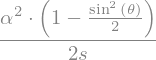

In [37]:
M_ave_photon.subs(high_energy_limit).subs(subs_e)

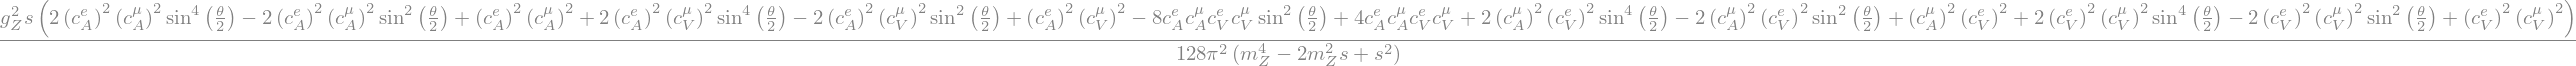

In [38]:
M_ave_Z.subs(high_energy_limit).subs(subs_e).simplify().collect(
    [
        sin(th), cos(th)
    ]
)

In [39]:
M_ave_H.subs(high_energy_limit).subs(subs_e)

In [40]:
from sympy import integrate

In [41]:
mZ_val = 91.1876 # GeV
me_val = 0.000511 # GeV
mmu_val = 0.105 #GeV
mtau_val = 1.777 # GeV

In [42]:
sigma_ll_mumu_photon = integrate(
    M_ave_photon*sin(th), (th, 0, pi), (phi, 0, 2*pi)
)

sigma_ll_mumu_Z = integrate(
    M_ave_Z*sin(th), (th, 0, pi), (phi, 0, 2*pi)
)

sigma_ll_mumu_H = integrate(
    M_ave_H*sin(th), (th, 0, pi), (phi, 0, 2*pi)
)

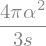

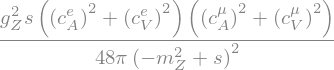

In [43]:
sigma_high_energy_photon = sigma_ll_mumu_photon.subs(high_energy_limit).subs(subs_e)
display(sigma_high_energy_photon)

sigma_high_energy_Z = sigma_ll_mumu_Z.subs(high_energy_limit).subs(subs_e).simplify().factor()
display(sigma_high_energy_Z)

In [44]:
from sympy import S

In [45]:
thW = symbols(r'\theta_W', positive=True)
def cV_def(I3, Q):
    return I3 - 2*Q*sin(thW)**2

subs_cVA = {
    cAe:-(S(1)/2), cVe:cV_def(-(S(1)/2), -1),
    cAmu:-(S(1)/2), cVmu:cV_def(-(S(1)/2), -1)
}
subs_gZ = {gZ:e/(sin(thW)*cos(thW))}

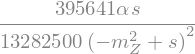

In [46]:
sinthw2_val = S(23)/100
sigma_high_energy_Z.subs(subs_cVA).subs(
    subs_gZ
    ).subs(cos(thW)**2, 1 - sin(thW)**2).subs(
        sin(thW)**2, sinthw2_val
        ).subs(subs_e)

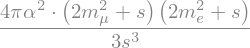

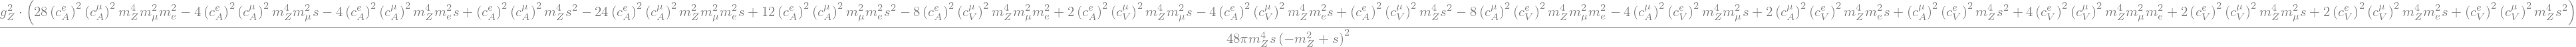

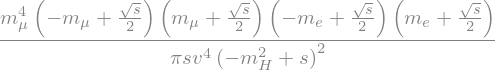

In [47]:
sigma_photon = sigma_ll_mumu_photon.subs(subs_e).factor()
display(sigma_photon)

sigma_Z = sigma_ll_mumu_Z.subs(subs_e).factor()
display(sigma_Z)


sigma_H = sigma_ll_mumu_H.factor().subs(E**2, s/4)
sigma_H

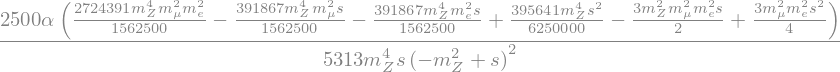

In [48]:
sigma_Z.subs(subs_cVA).subs(
    subs_gZ
    ).subs(cos(thW)**2, 1 - sin(thW)**2).subs(
        sin(thW)**2, sinthw2_val
        ).subs(subs_e)


## Plot the cross section

In [49]:
from sympy import lambdify
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
t = symbols('t', positive=True)
def function(exp):
    exp = exp.subs(subs_cVA).subs(
    subs_gZ
    ).subs(cos(thW)**2, 1 - sin(thW)**2).subs(
        sin(thW)**2, sinthw2_val
        ).subs(subs_e)
    return lambdify(t, 
                    exp.subs(s, t**2).subs(alpha, 1/137).subs(
                        {
                            me:me_val,
                            mmu:mmu_val,
                            mZ:mZ_val,
                            mH:125,
                            vev:246
                        }
                    ), 
                    'numpy')

In [51]:
sigma_photon_f = function(sigma_photon)
sigma_he_photon_f = function(sigma_high_energy_photon)
sigma_Z_f = function(sigma_Z)
sigma_he_Z_f = function(sigma_high_energy_Z)
sigma_H_f = function(sigma_H)

<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: divide by zero encountered in true_divide
<string>:2: RuntimeWarning: divide by zero encountered in true_divide


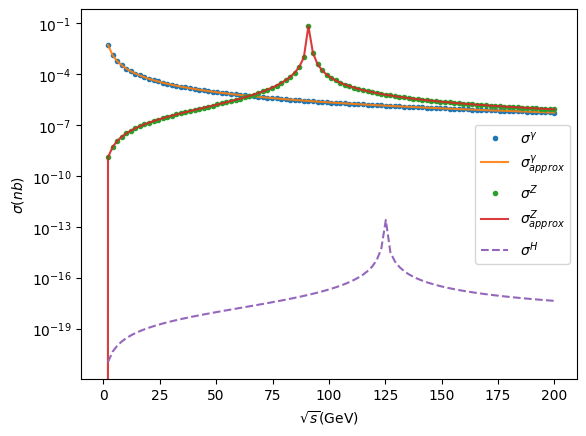

In [52]:
sqrt_s = np.linspace(0,200, 100)
plt.semilogy(sqrt_s, 1e2*sigma_photon_f(sqrt_s), '.', label='$\sigma^\gamma$')
plt.semilogy(sqrt_s, 1e2*sigma_he_photon_f(sqrt_s), '-', label='$\sigma_{approx}^\gamma$'
    ,alpha=0.9)
plt.semilogy(sqrt_s, 1e2*sigma_Z_f(sqrt_s), '.', label='$\sigma^Z$')
plt.semilogy(sqrt_s, 1e2*sigma_he_Z_f(sqrt_s), '-', label='$\sigma_{approx}^Z$'
    ,alpha=0.9)
plt.semilogy(sqrt_s, 1e2*sigma_H_f(sqrt_s), '--', label='$\sigma^H$')

plt.xlabel('$\sqrt{s}$(GeV)')
plt.ylabel('$\sigma(nb)$')
plt.legend()